In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "final_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

open file

In [ ]:
import os
import pandas as pd

DATA_PATH = os.path.join("HF")
def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path,"data01.csv")
    return pd.read_csv(csv_path,sep=",")

In [ ]:
HF = load_data()

#processing

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
from pandas.core.internals import concat
HF_num = pd.concat([HF.iloc[:,1],HF.iloc[:,3],HF.iloc[:,13:]],axis=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('min-max', MinMaxScaler()),
    ])

HF_num_tr = pd.DataFrame(num_pipeline.fit_transform(HF_num))

In [ ]:
HF_num_tr.columns = list(HF_num.columns)

In [ ]:
HF_all = pd.concat([HF.iloc[:,0],HF.iloc[:,2],HF.iloc[:,4:13],HF_num_tr],axis=1)

In [ ]:
HF_all

,outcome,gendera,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,1,0,0,0,1,1,0,1,1,...,0.601029,0.179679,0.683867,0.346185,0.455782,0.285714,0.238714,0.000000,0.266124,0.666667
1,0.0,2,0,0,0,0,1,0,0,0,...,0.604495,0.344118,0.430145,0.254886,0.182398,0.275510,0.591427,0.000000,0.742016,0.666667
2,0.0,2,0,0,0,0,1,0,0,1,...,0.650050,0.368627,0.605553,0.178313,0.283285,0.363265,0.508892,0.000000,0.660614,0.333333
3,0.0,2,0,0,0,0,0,0,0,0,...,0.594790,0.653394,0.279339,0.303270,0.203110,0.571429,0.738714,0.012766,0.704446,0.666667
4,0.0,2,1,0,0,0,1,0,0,1,...,0.549037,0.478431,0.573439,0.452209,0.093537,0.326531,0.262654,0.012766,0.391359,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,1,1,1,0,1,0,1,1,1,...,0.550225,0.840336,0.335116,0.716007,0.491740,0.591837,0.426813,0.140426,0.303694,0.416667
1173,0.0,1,0,1,0,1,0,1,1,1,...,0.524413,0.899654,0.507655,0.610892,0.229167,0.591837,0.218988,0.140426,0.303694,0.250000
1174,0.0,2,1,1,0,1,1,0,0,1,...,0.532399,0.415686,0.402726,0.390361,0.235180,0.591837,0.459644,0.140426,0.303694,0.666667
1175,0.0,2,0,0,1,1,1,1,1,1,...,0.632224,0.349020,0.561607,0.483133,0.258163,0.591837,0.330882,0.140426,0.303694,0.166667


#PLOT_attribute

Saving figure attribute_histogram_plots_bins_30


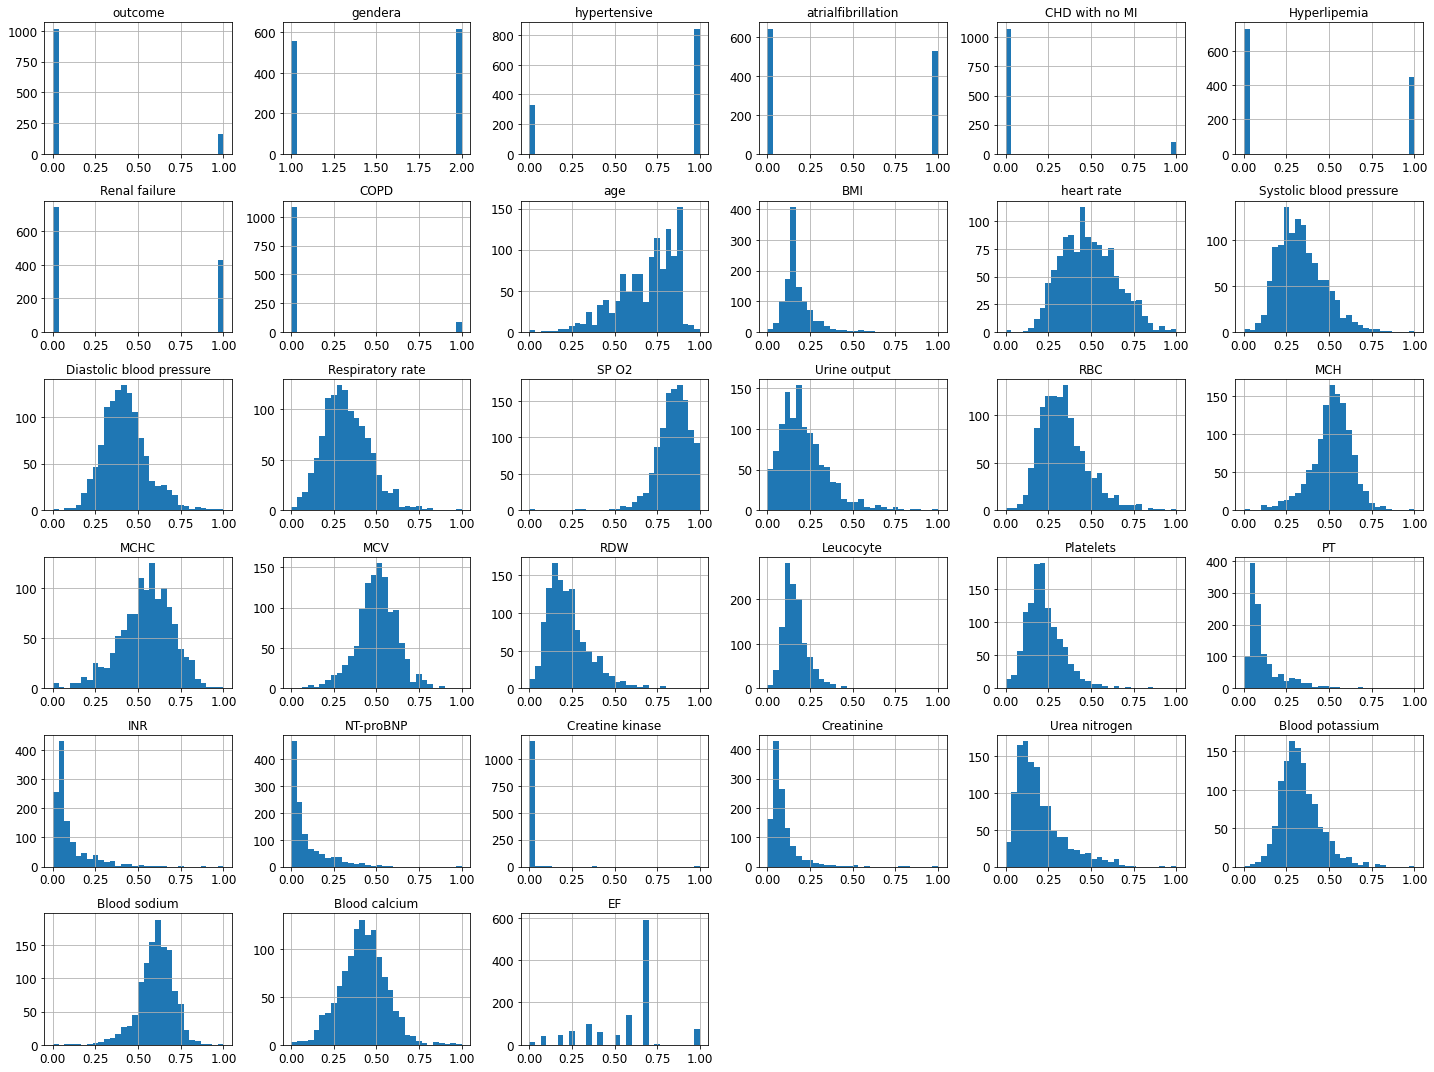

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
HF_all.hist(bins=30, figsize=(20,15))
save_fig("attribute_histogram_plots_bins_30")
plt.show()

#correlation

In [ ]:
corr_matrix = HF_num_tr.corr()

In [ ]:
corr_matrix["NT-proBNP"].sort_values(ascending=False)

NT-proBNP                   1.000000
Creatinine                  0.399814
Urea nitrogen               0.380208
RDW                         0.223664
Blood potassium             0.119770
SP O2                       0.091010
Leucocyte                   0.086017
INR                         0.078491
PT                          0.076983
age                         0.054391
MCV                         0.036253
heart rate                  0.001368
Creatine kinase            -0.006240
MCH                        -0.006893
Diastolic blood pressure   -0.016126
Respiratory rate           -0.026423
Platelets                  -0.032922
Blood calcium              -0.055239
Blood sodium               -0.068210
Systolic blood pressure    -0.072337
MCHC                       -0.076950
RBC                        -0.157534
BMI                        -0.164860
EF                         -0.208068
Urine output               -0.215064
Name: NT-proBNP, dtype: float64

Saving figure scatter_matrix_plot


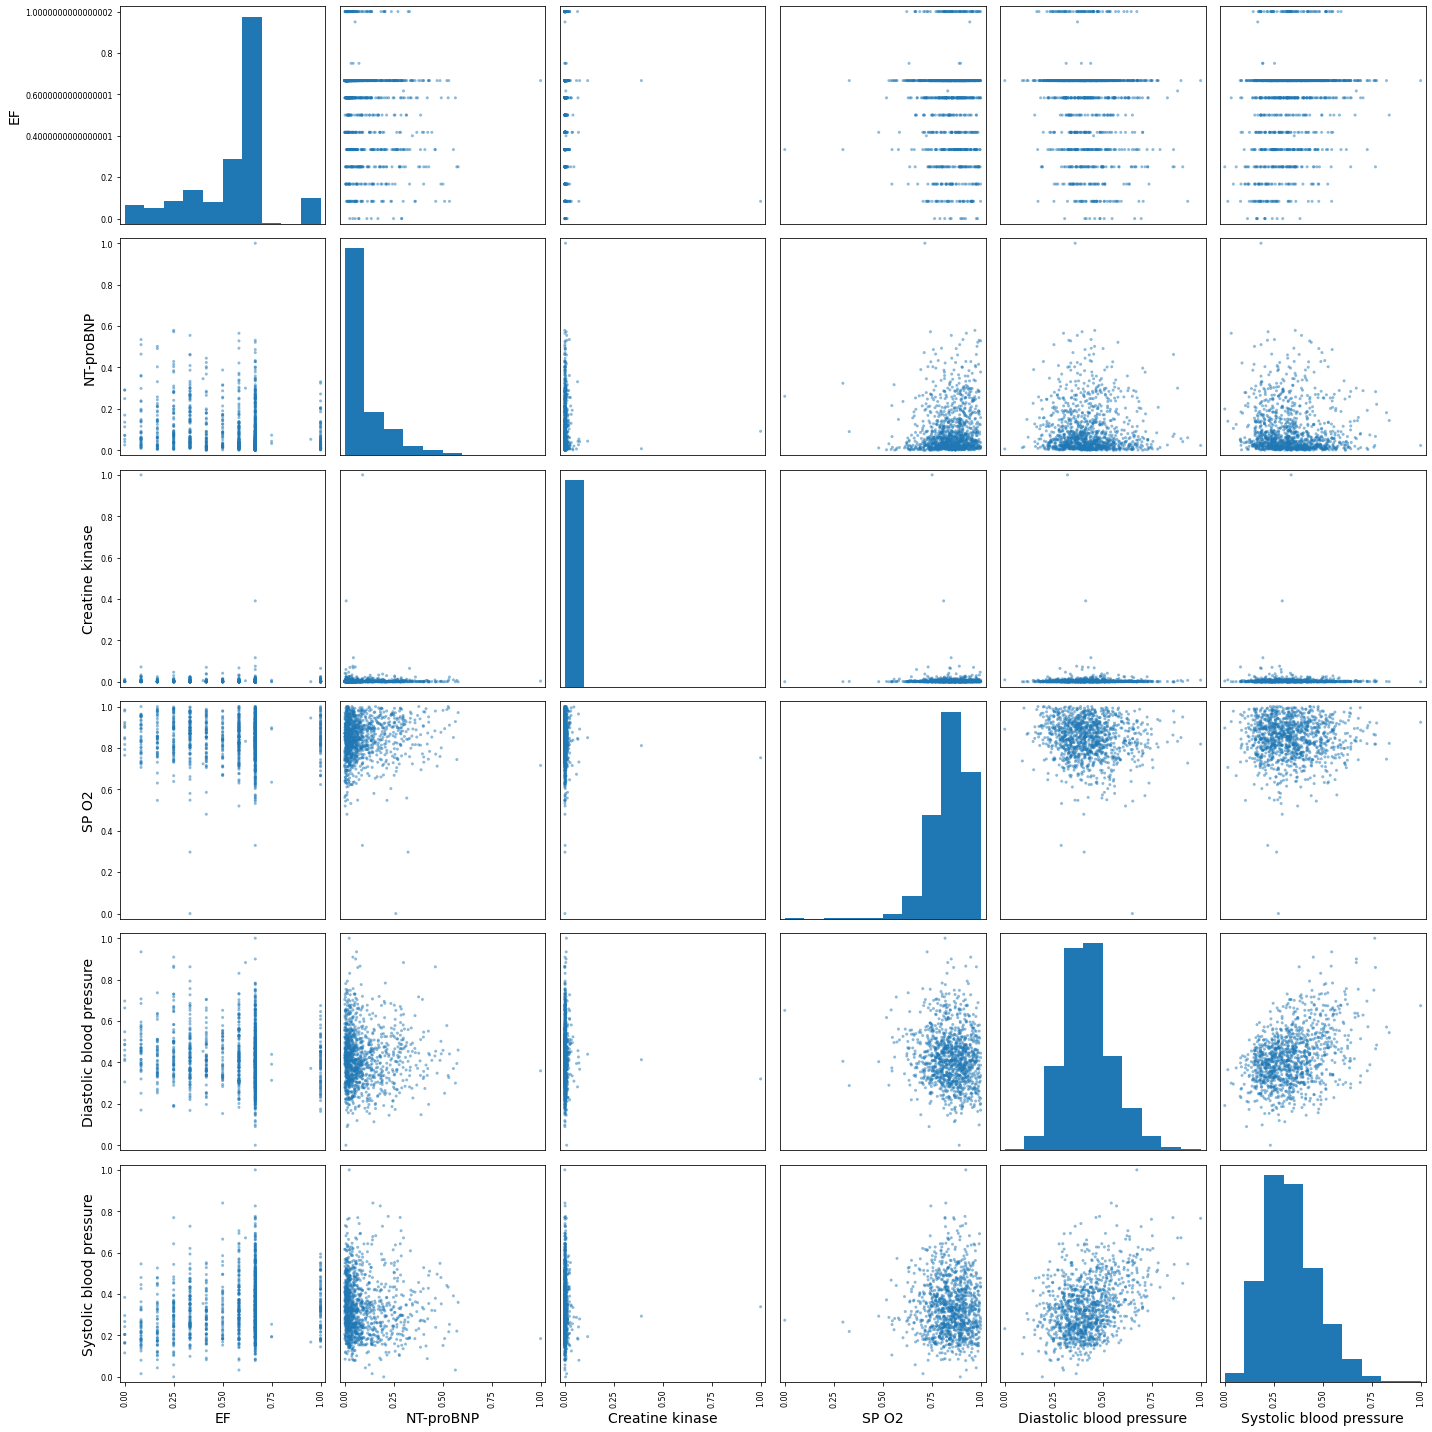

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["EF", "NT-proBNP", "Creatine kinase",
              "SP O2", "Diastolic blood pressure", "Systolic blood pressure"]
scatter_matrix(HF_num_tr[attributes], figsize=(20, 20))
save_fig("scatter_matrix_plot")

#traning & testing

In [ ]:
def which(self):
    try:
        self = list(iter(self))
    except TypeError as e:
        raise Exception("""'which' method can only be applied to iterables.
        {}""".format(str(e)))
    indices = [i for i, x in enumerate(self) if bool(x) == True]
    return(indices)

# If you want to apply it as a class method to Pandas Series objects
#pd.Series.which = which

In [ ]:
HF_alive = HF_all.iloc[which(HF.outcome==0), :]
HF_dead = HF_all.iloc[which(HF.outcome==1), :]

In [ ]:
#import numpy as np

# For illustration only. Sklearn has train_test_split()
#def split_train_test(data, test_ratio):
#    shuffled_indices = np.random.permutation(len(data))
#    test_set_size = int(len(data) * test_ratio)
#    test_indices = shuffled_indices[:test_set_size]
#    train_indices = shuffled_indices[test_set_size:]
#    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
#HF_alive_train,HF_alive_test = split_train_test(HF_alive, 0.3)

In [ ]:
from sklearn.model_selection import train_test_split

HF_alive_train,HF_alive_test = train_test_split(HF_alive, test_size=0.3, random_state=42)
HF_dead_train,HF_dead_test = train_test_split(HF_dead, test_size=0.3, random_state=42)

In [ ]:
HF_train =  pd.concat([HF_alive_train,HF_dead_train], axis=0)
HF_test =  pd.concat([HF_alive_test,HF_dead_test], axis=0)
x_HF_train,y_HF_train,x_HF_test,y_HF_test = HF_train.iloc[:,1:],HF_train.iloc[:,0],HF_test.iloc[:,1:],HF_test.iloc[:,0]

In [ ]:
from imblearn.over_sampling import SMOTE

x_HF_train_re, y_HF_train_re = SMOTE(random_state=42).fit_resample(x_HF_train, y_HF_train)
#X_rere, y_rere = TomekLinks().fit_resample(X_re, y_re)

#random forest regressor

#Grid Search

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 10],  'min_samples_leaf': [2, 6, 10, 14], 'max_leaf_nodes': [2, 20, 40, 60],'max_depth': [8,10,12,15]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 10],  'min_samples_leaf':[2, 6, 10, 14], 'max_leaf_nodes': [2, 20, 40, 60],'max_depth': [8,10,12,15]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_HF_train_re, y_HF_train_re)

KeyboardInterrupt: ignored

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
np.round(y_HF_pred)

In [ ]:
model_forest_reg = RandomForestRegressor(bootstrap=False, max_depth=15, max_features=10, max_leaf_nodes=60, min_samples_leaf=2, n_estimators=100, random_state=42)
model_forest_reg.fit(x_HF_train_re, y_HF_train_re)
#, min_samples_split=,min_samples_leaf=, max_leaf_nodes=,max_depth=

In [ ]:
model_forest_reg = RandomForestRegressor(max_depth=8, max_features=8, max_leaf_nodes=8,
                      min_samples_leaf=6,n_estimators=100, random_state=42)
model_forest_reg.fit(x_HF_train_re, y_HF_train_re)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#算accuracy score
y_HF_pred = grid_search.predict(x_HF_test)
accuracy = accuracy_score(y_HF_test, np.round(y_HF_pred)) #np.round: 四捨五入
auroc = roc_auc_score(y_HF_test, np.round(y_HF_pred))
print("accuracy:", accuracy, "\n", "auroc:", auroc)


plot

In [ ]:
plt.scatter(y_HF_test, y_HF_pred)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.plot([-0.1, 1.1], [-0.1, 1.1], 'black') #1 to 1 line

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model_forest_reg.estimators_[0]
# Export the image to a dot file
feature_list = list(x_HF_test.columns)
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
#深度的關係圖
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 20, 20, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    model_forest_reg_depth = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)
    model_forest_reg_depth.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_depth.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_depth.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(max_depths, train_results, 'b', label='Train')
line2, = plt.plot(max_depths, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('max depth')
save_fig("max_depth")

In [ ]:
#estimator關係圖
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
estimators = np.arange(10, 100, 10)
train_results = []
test_results = []
for n_estimators in estimators:
    model_forest_reg_estimator = RandomForestRegressor(n_estimators=n_estimators, max_depth=15, random_state=42)
    model_forest_reg_estimator.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_estimator.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_estimator.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(estimators, train_results, 'b', label='Train')
line2, = plt.plot(estimators, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('estimators')
save_fig("estimators_10_100")

In [ ]:
#max_leaf_node關係圖
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
leaf_nodes = np.arange(10, 110, 10)
train_results = []
test_results = []
for max_leaf_nodes in leaf_nodes:
    model_forest_reg_leafnodes = RandomForestRegressor(n_estimators=100, max_depth=15, max_leaf_nodes=max_leaf_nodes, random_state=42)
    model_forest_reg_leafnodes.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_leafnodes.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_leafnodes.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(leaf_nodes, train_results, 'b', label='Train')
line2, = plt.plot(leaf_nodes, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('leaf_nodes')
save_fig("max_leaf_nodes_10_60")

In [ ]:
#min_samples_leaf關係圖
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
min_samples = np.arange(2, 22, 4)
train_results = []
test_results = []
for min_samples_leaf in min_samples:
    model_forest_reg_min_samples = RandomForestRegressor(n_estimators=100, max_depth=15, max_leaf_nodes=60, min_samples_leaf=min_samples_leaf, random_state=42)
    model_forest_reg_min_samples.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_min_samples.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_min_samples.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(min_samples, train_results, 'b', label='Train')
line2, = plt.plot(min_samples, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('min_samples_leaf')
save_fig("min_samples_leaf_2_18")

In [ ]:
#min_samples_split關係圖
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
min_samples = np.arange(2, 22, 4)
train_results = []
test_results = []
for min_samples_split in min_samples:
    model_forest_reg_min_samples_split = RandomForestRegressor(n_estimators=100, max_depth=15, max_leaf_nodes=60, min_samples_leaf=14, min_samples_split=min_samples_split, random_state=42)
    model_forest_reg_min_samples_split.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_min_samples_split.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_min_samples_split.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(min_samples, train_results, 'b', label='Train')
line2, = plt.plot(min_samples, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('min_samples_split')
save_fig("min_samples_split_2_18")

In [ ]:
#max_features關係圖
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
features = np.arange(2, 22, 4)
train_results = []
test_results = []
for max_features in features:
    model_forest_reg_features = RandomForestRegressor(n_estimators=100, max_depth=15, max_leaf_nodes=60, min_samples_leaf=14, max_features=max_features, random_state=42)
    model_forest_reg_features.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_features.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_features.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(features, train_results, 'b', label='Train')
line2, = plt.plot(features, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('max_features')
save_fig("max_features_2_18")

In [ ]:
estimators = np.arange(4, 24, 4)
estimators

#random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:


param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [100, 300, 500, 1000], 'max_features': [2, 4, 6, 8, 10],  'min_samples_leaf': [2, 6, 10, 14], 'max_leaf_nodes': [2, 20, 40, 80, 100],'max_depth': [8,10,15,20]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [100, 300, 500, 1000], 'max_features': [2, 4, 6, 8, 10],  'min_samples_leaf':[2, 6, 10, 14], 'max_leaf_nodes': [2, 20, 40, 80, 100],'max_depth': [8,10,15,20]},
  ]
#, 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [2, 4, 6, 8], 'max_leaf_nodes': [2, 4, 6, 8],'max_depth': [2, 4, 6, 8]
#, 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [2, 4, 6, 8], 'max_leaf_nodes': [2, 4, 6, 8],'max_depth': [2, 4, 6, 8]
forest_cla = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search_rfc = GridSearchCV(forest_cla, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_rfc.fit(x_HF_train_re, y_HF_train_re)

KeyboardInterrupt: ignored

In [ ]:
grid_search_rfc.best_params_

In [ ]:
grid_search_rfc.best_estimator_

In [ ]:
cvres = grid_search_rfc.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search_rfc.cv_results_)

In [ ]:
#model_forest_cla = RandomForestClassifier(n_estimators=30,max_features=4, random_state=42)
#min_samples_split=,min_samples_leaf=, max_leaf_nodes=,max_depth=,
#model_forest_cla.fit(x_HF_train_re, y_HF_train_re)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#算accuracy score
model_forest_cla = RandomForestClassifier(n_estimators=500, bootstrap=False, max_depth=15, max_features=4,
                       max_leaf_nodes=60, min_samples_leaf=2, random_state=42).fit(x_HF_train_re, y_HF_train_re)
y_HF_pred = model_forest_cla.predict(x_HF_test)
final_mse = mean_squared_error(y_HF_test, y_HF_pred)
final_rmse = np.sqrt(final_mse)
accuracy = accuracy_score(y_HF_test, y_HF_pred) #np.round: 四捨五入
auroc = roc_auc_score(y_HF_test, y_HF_pred)
print("final rmse:", final_rmse, "\n", "accuracy:", accuracy, "\n", "auroc:", auroc)

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(model_forest_cla, x_HF_test, y_HF_test,random_state=42)

feature_names = x_HF_test.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(12, 10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
#estimator關係圖
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
estimators = np.arange(100, 1100, 100)
train_results = []
test_results = []
for n_estimators in estimators:
    model_forest_reg_estimator = RandomForestClassifier(n_estimators=n_estimators, max_depth=15, random_state=42)
    model_forest_reg_estimator.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_estimator.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_estimator.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(estimators, train_results, 'b', label='Train')
line2, = plt.plot(estimators, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('estimators')
#save_fig("estimators_10_100")

In [ ]:
#深度的關係圖
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 60, 20, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    model_forest_reg_depth = RandomForestClassifier(n_estimators=500, max_depth=max_depth, random_state=42)
    model_forest_reg_depth.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_depth.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_depth.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(max_depths, train_results, 'b', label='Train')
line2, = plt.plot(max_depths, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('max depth')
#save_fig("max_depth")

In [ ]:
#max_leaf_node關係圖
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
leaf_nodes = np.arange(10, 110, 10)
train_results = []
test_results = []
for max_leaf_nodes in leaf_nodes:
    model_forest_reg_leafnodes = RandomForestClassifier(n_estimators=500, max_depth=20, max_leaf_nodes=max_leaf_nodes, random_state=42)
    model_forest_reg_leafnodes.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_leafnodes.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_leafnodes.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(leaf_nodes, train_results, 'b', label='Train')
line2, = plt.plot(leaf_nodes, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('leaf_nodes')
#save_fig("max_leaf_nodes_10_60")

In [ ]:
#min_samples_leaf關係圖
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
min_samples = np.arange(2, 22, 4)
train_results = []
test_results = []
for min_samples_leaf in min_samples:
    model_forest_reg_min_samples = RandomForestClassifier(n_estimators=500, max_depth=20, max_leaf_nodes=100, min_samples_leaf=min_samples_leaf, random_state=42)
    model_forest_reg_min_samples.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_min_samples.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_min_samples.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(min_samples, train_results, 'b', label='Train')
line2, = plt.plot(min_samples, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('min_samples_leaf')
#save_fig("min_samples_leaf_2_18")

In [ ]:
#max_features關係圖
from sklearn.metrics import mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
features = np.arange(2, 22, 4)
train_results = []
test_results = []
for max_features in features:
    model_forest_reg_features = RandomForestClassifier(n_estimators=500, max_depth=20, max_leaf_nodes=100, min_samples_leaf=14, max_features=max_features, random_state=42)
    model_forest_reg_features.fit(x_HF_train_re, y_HF_train_re)
    y_pred_train = model_forest_reg_features.predict(x_HF_train_re)
    train_score = mean_squared_error(y_HF_train_re, y_pred_train)
    train_results.append(train_score)
    y_pred_prob_test = model_forest_reg_features.predict(x_HF_test)
    test_score = mean_squared_error(y_HF_test, y_pred_prob_test)
    test_results.append(test_score)
plt.figure(figsize=(12, 8))
line1, = plt.plot(features, train_results, 'b', label='Train')
line2, = plt.plot(features, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mean squared error')
plt.xlabel('max_features')
#save_fig("max_features_2_18")

In [ ]:
estimators = np.arange(0, 1000, 100)
estimators

#SVM SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:


param_grid = [
    {'C': [0.01, 1, 100, 1e4, 1e6, 1e8], 'kernel': ['linear']},
    {'C': [0.01, 1, 100, 1e4, 1e6, 1e8], 'kernel': ['rbf', 'sigmoid'],  'gamma': ['scale', 'auto',]},
    {'C': [0.01, 1, 100, 1e4, 1e6, 1e8], 'kernel': ['poly'],  'gamma': ['scale', 'auto',], 'degree': [2,3,4]},
  ]

svm_cla = SVC(random_state=42)

grid_search_svc = GridSearchCV(svm_cla, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search_svc.fit(x_HF_train_re, y_HF_train_re)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [100, 1000], 'kernel': ['linear']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search_svc.best_params_

{'C': 100, 'kernel': 'linear'}

In [ ]:
grid_search_svc.best_estimator_

SVC(C=100, kernel='linear', random_state=42)

In [ ]:
cvres = grid_search_svc.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4452755592849953 {'C': 100, 'kernel': 'linear'}
0.4492120328498878 {'C': 1000, 'kernel': 'linear'}


In [ ]:
pd.DataFrame(grid_search_rfc.cv_results_)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#算accuracy score
model_svc = SVC(C=100, kernel='linear', random_state=42).fit(x_HF_train_re, y_HF_train_re)
y_HF_train_pred = model_svc.predict(x_HF_train_re)
y_HF_pred = model_svc.predict(x_HF_test)
final_mse = mean_squared_error(y_HF_test, y_HF_pred)
final_rmse = np.sqrt(final_mse)
accuracy = accuracy_score(y_HF_test, y_HF_pred) #np.round: 四捨五入
auroc_train = roc_auc_score(y_HF_train_re, y_HF_train_pred)
auroc = roc_auc_score(y_HF_test, y_HF_pred)
print("final rmse:", final_rmse, "\n", "accuracy:", accuracy, "\n", "auroc_train:", auroc_train, "\n", "auroc:", auroc)

final rmse: 0.46638409524102054 
 accuracy: 0.7824858757062146 
 auroc_train: 0.8115330520393812 
 auroc: 0.7160947712418301


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 15.3 MB/s 


In [ ]:
import xgboost
import shap
model_rfr = RandomForestRegressor(bootstrap=True, max_depth=4, max_features=9, max_leaf_nodes=10, min_samples_leaf=8, n_estimators=500,
                    random_state=42).fit(x_HF_train_re.values, y_HF_train_re.values)
explainer = shap.KernelExplainer(model_rfr.predict, x_HF_test.values)

In [ ]:
shap_values = explainer.shap_values(x_HF_test.values)

# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])

  0%|          | 0/354 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

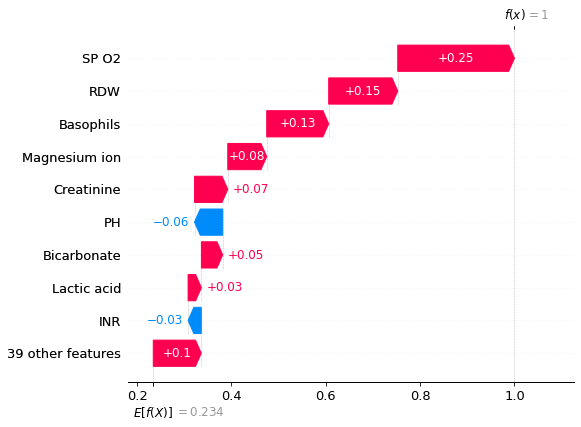

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names=HF_all.columns)
#save_fig("SHAP_rfr_02")

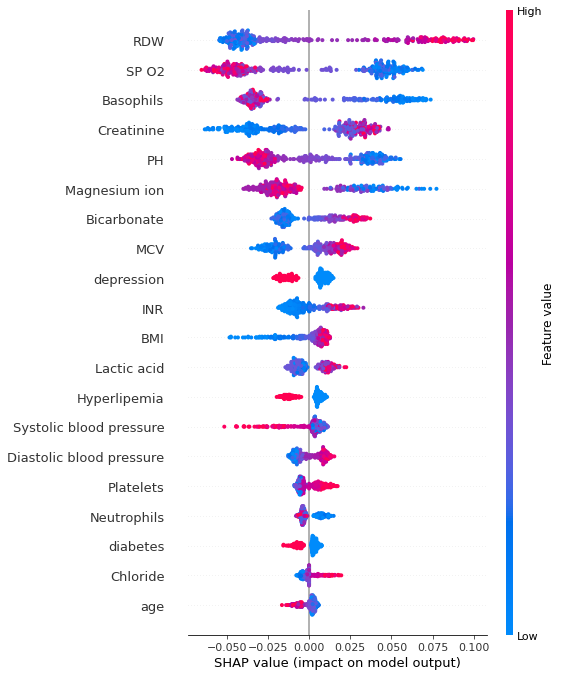

In [ ]:
shap.summary_plot(shap_values,x_HF_test, feature_names=HF_all.columns)
#save_fig('SHAP')

In [ ]:
shap.plots.beeswarm(feature_names=HF_all.columns)

TypeError: ignored

X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but Ran

Saving figure perm_importance_rfr_origin


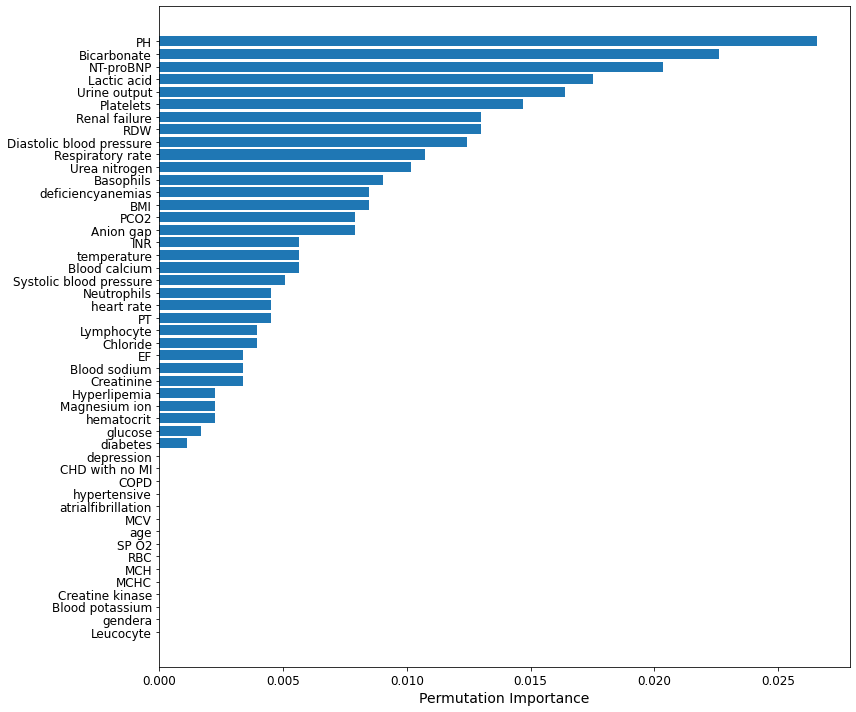

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(model_rfc, x_HF_test, y_HF_test)

feature_names = x_HF_test.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(12, 10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
save_fig("perm_importance_rfr_origin")

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   #這些密密麻麻的點都進去model預測類別
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)    #就可以把不同顏色區塊畫出來
    return out

AttributeError: ignored

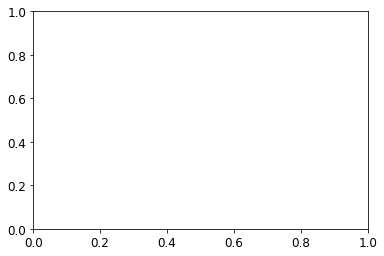

In [ ]:
models = SVC(C=100, kernel='linear', random_state=42).fit(x_HF_train_re, y_HF_train_re)

# title for the plots
titles = 'SVC with linear kernel'

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_HF_train_re.loc[:,'MCV'], x_HF_train_re.loc[:,'Renal failure']
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_HF_train_re, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('MCV')
    ax.set_ylabel('Renal failure')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [ ]:
from sklearn.manifold import TSNE

clf = TSNE(n_components=2, learning_rate='auto',  init='random', perplexity=3)
Xreduced = clf.fit_transform(x_HF_train_re)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 100, x.max() + 100
    y_min, y_max = y.min() - 100, y.max() + 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

clf = model_svc.fit(Xreduced, y_HF_train_re)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_HF_train_re, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()

In [ ]:
Xreduced

array([[-0.43485121],
       [-0.73265085],
       [-0.31281124],
       ...,
       [ 1.03412477],
       [ 1.08712278],
       [ 0.61244007]])

#Confusion matrix

In [ ]:
from sklearn import metrics

In [ ]:
# Testing data evaluation

model_forest_cla = RandomForestRegressor(bootstrap=True, max_depth=4, max_features=9, max_leaf_nodes=10, min_samples_leaf=8, n_estimators=500,
random_state=42
).fit(x_HF_train_re, y_HF_train_re)
expected = y_HF_test
predicted = np.round(model_forest_cla.predict(x_HF_test))

print("Classification report for classifier %s:\n%s\n"
      % (model_forest_cla, metrics.classification_report(expected, predicted)))

Classification report for classifier RandomForestRegressor(max_depth=4, max_features=9, max_leaf_nodes=10,
                      min_samples_leaf=8, n_estimators=500, random_state=42):
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       306
           1       0.29      0.50      0.37        48

    accuracy                           0.77       354
   macro avg       0.60      0.65      0.61       354
weighted avg       0.83      0.77      0.79       354


